<a href="https://colab.research.google.com/github/mohdsyed/Ansible-aws/blob/master/Image_Classification_using_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jan 22 14:01:08 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
os.chdir("/content/drive/MyDrive/classes/euron/CV")

In [ ]:
%pwd

'/content/drive/MyDrive/classes/euron/CV'

In [ ]:
%ls

 cat-dog-data.zip  'Image Classification using Transfer learning.ipynb'


In [ ]:
!unzip cat-dog-data.zip

Archive:  cat-dog-data.zip
   creating: cat-dog-data/
   creating: cat-dog-data/train/
   creating: cat-dog-data/train/Cat/
  inflating: cat-dog-data/train/Cat/0.jpg  
  inflating: cat-dog-data/train/Cat/1.jpg  
  inflating: cat-dog-data/train/Cat/2.jpg  
  inflating: cat-dog-data/train/Cat/cat.2405.jpg  
  inflating: cat-dog-data/train/Cat/cat.2406.jpg  
  inflating: cat-dog-data/train/Cat/cat.2436.jpg  
  inflating: cat-dog-data/train/Cat/cat.2437.jpg  
  inflating: cat-dog-data/train/Cat/cat.2438.jpg  
  inflating: cat-dog-data/train/Cat/cat.2439.jpg  
  inflating: cat-dog-data/train/Cat/cat.2440.jpg  
  inflating: cat-dog-data/train/Cat/cat.2441.jpg  
  inflating: cat-dog-data/train/Cat/cat.2442.jpg  
  inflating: cat-dog-data/train/Cat/cat.2443.jpg  
  inflating: cat-dog-data/train/Cat/cat.2444.jpg  
  inflating: cat-dog-data/train/Cat/cat.2445.jpg  
  inflating: cat-dog-data/train/Cat/cat.2446.jpg  
  inflating: cat-dog-data/train/Cat/cat.2447.jpg  
  inflating: cat-dog-data/trai

In [ ]:
%ls

 cat-dog-data/   cat-dog-data.zip  'Image Classification using Transfer learning.ipynb'


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/classes/euron/CV/cat-dog-data/train'
valid_path = '/content/drive/MyDrive/classes/euron/CV/cat-dog-data/validation'

In [ ]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/classes/euron/CV/cat-dog-data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/classes/euron/CV/cat-dog-data/train/Cat',
 '/content/drive/MyDrive/classes/euron/CV/cat-dog-data/train/Dog']

In [ ]:
num_of_class = len(folders)

In [ ]:
num_of_class


2

In [ ]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_of_class,activation='softmax'))

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 337 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5340 - loss: 4.8210 - val_accuracy: 0.5085 - val_loss: 1.9072
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 698ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.5519 - loss: 1.1497 - val_accuracy: 0.7288 - val_loss: 0.5258
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step - accuracy: 0.7425 - loss: 0.4791 - val_accuracy: 0.8475 - val_loss: 0.4246
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.9126 - loss: 0.2728 - val_accuracy: 0.8644 - val_loss: 0.4102
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.9096 - loss: 0.2387 - val_accuracy: 0.8305 - val_loss: 0.3715
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
import matplotlib.pyplot as plt

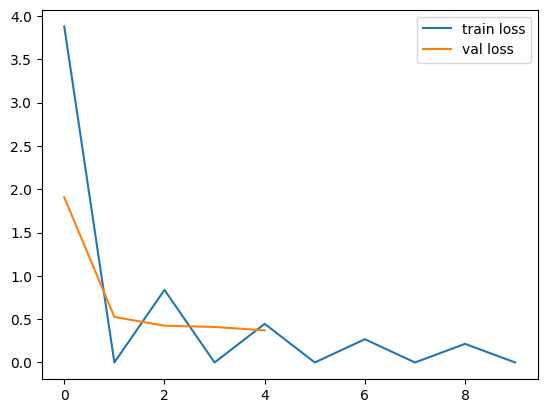

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

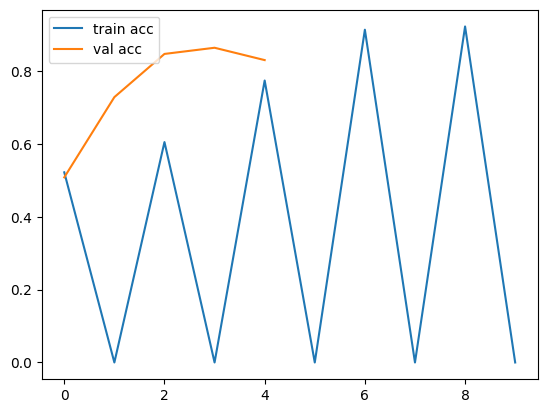

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.evaluate(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8245 - loss: 0.3735


[0.3715284764766693, 0.8305084705352783]

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
model = load_model("model_vgg16.h5")

In [ ]:
y_pred = model.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 827ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
%pwd

'/content/drive/MyDrive/classes/euron/CV'

In [ ]:
%ls

 AccVal_acc.png     cat.jpg                                               LossVal_loss.png
 cat-dog-data/      dog.jpg                                               model_vgg16.h5
 cat-dog-data.zip  'Image Classification using Transfer learning.ipynb'


In [ ]:
img=image.load_img('dog.jpg',target_size=(224,224))

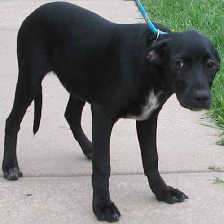

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[202., 196., 198.],
        [203., 197., 199.],
        [205., 199., 201.],
        ...,
        [129., 167., 120.],
        [162., 201., 156.],
        [153., 193., 159.]],

       [[201., 195., 197.],
        [199., 193., 195.],
        [200., 194., 196.],
        ...,
        [106., 147., 103.],
        [102., 143., 101.],
        [110., 150., 115.]],

       [[218., 212., 214.],
        [219., 213., 215.],
        [214., 208., 210.],
        ...,
        [121., 168., 126.],
        [108., 153., 114.],
        [105., 147., 109.]],

       ...,

       [[204., 190., 190.],
        [215., 201., 201.],
        [214., 202., 202.],
        ...,
        [206., 200., 200.],
        [210., 204., 204.],
        [206., 200., 202.]],

       [[214., 202., 202.],
        [204., 192., 192.],
        [212., 202., 201.],
        ...,
        [203., 197., 197.],
        [208., 202., 202.],
        [208., 202., 204.]],

       [[214., 206., 204.],
        [208., 200., 198.],
        [208., 2

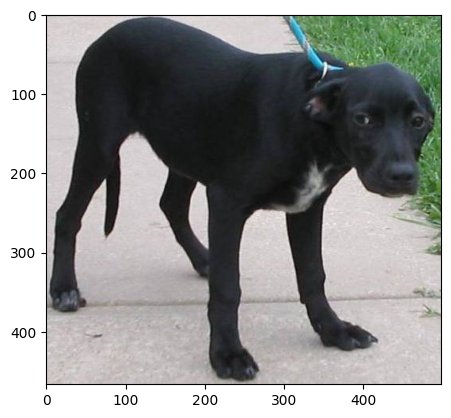

In [ ]:
Z = plt.imread('dog.jpg')
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [ ]:
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.9954757 , 0.00452427]], dtype=float32)

In [ ]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
result[0]

0

In [ ]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
